In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import sys
sys.path.append("../common")
import functions

# Q41～Q43 Cannyエッジ検出

Cannyエッジ検出の手順  
1. ガウシアンフィルタをかける
2. Sobelフィルタを用いてエッジ強度, エッジ勾配を計算する
3. エッジ勾配の値からNon-maximum supressionを行い, エッジの細線化を行う
4. ヒステリシスにより閾値処理を行う.

ステップ1 エッジ強度  
Cannyエッジ検出のステップ1としてエッジ強度, エッジ勾配を求める.

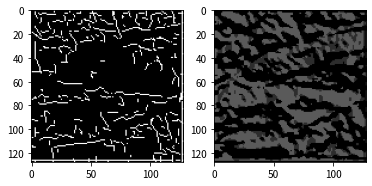

In [4]:
img = cv2.imread("imori.jpg")
# グレースケール変換
img_gray = functions.grayscale(img)
# ガウシアンフィルタ
img_gaussian= functions.gaussian_filter(img_gray,5,1.4)
# sobelフィルタ
img_sobel_x = functions.sobel_filter(img_gaussian,"x")
img_sobel_y = functions.sobel_filter(img_gaussian,"y")
# エッジ強度, 勾配を計算
edge,angle = functions.get_edge_angle(img_sobel_x,img_sobel_y)
angle = functions.angle_quantization(angle)
edge = functions.non_maximum_suppression(angle,edge)
edge = functions.hysterisis(edge, 50, 20)

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(edge.astype(np.uint8), cv2.COLOR_BGR2RGB))
plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(angle, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
angle